<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/presentation_visiualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount = True)

Mounted at /gdrive


In [2]:
%cd "/gdrive/My Drive/tensor-flow-state/tensor-flow-state"

/gdrive/My Drive/tensor-flow-state/tensor-flow-state


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import pandas as pd
import numpy as np

In [4]:
mpl.style.use('tableau-colorblind10')
mpl.rcParams.update({"lines.linewidth": 1, "font.family": "serif", "xtick.labelsize": "small", "ytick.labelsize": "small", "xtick.major.size" : 0, "xtick.minor.size" : 0, "ytick.major.size" : 0, "ytick.minor.size" : 0, 
                     "figure.figsize": (16,9), "figure.dpi": 300, "figure.autolayout": True, "savefig.format": "png", "savefig.transparent": True})
plotdir = "../../Internship_Wagga/Final Presentation/"

# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# pylab.rcParams.update(params)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       
print('\n'.join(color for color in colors))   

#006BA4
#FF800E
#ABABAB
#595959
#5F9ED1
#C85200
#898989
#A2C8EC
#FFBC79
#CFCFCF


In [0]:
df = pd.read_csv("data/final_data.csv", index_col = 0, parse_dates = True)

In [0]:
temp = df.resample('W').sum()['flow'][1:-1]

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:208: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


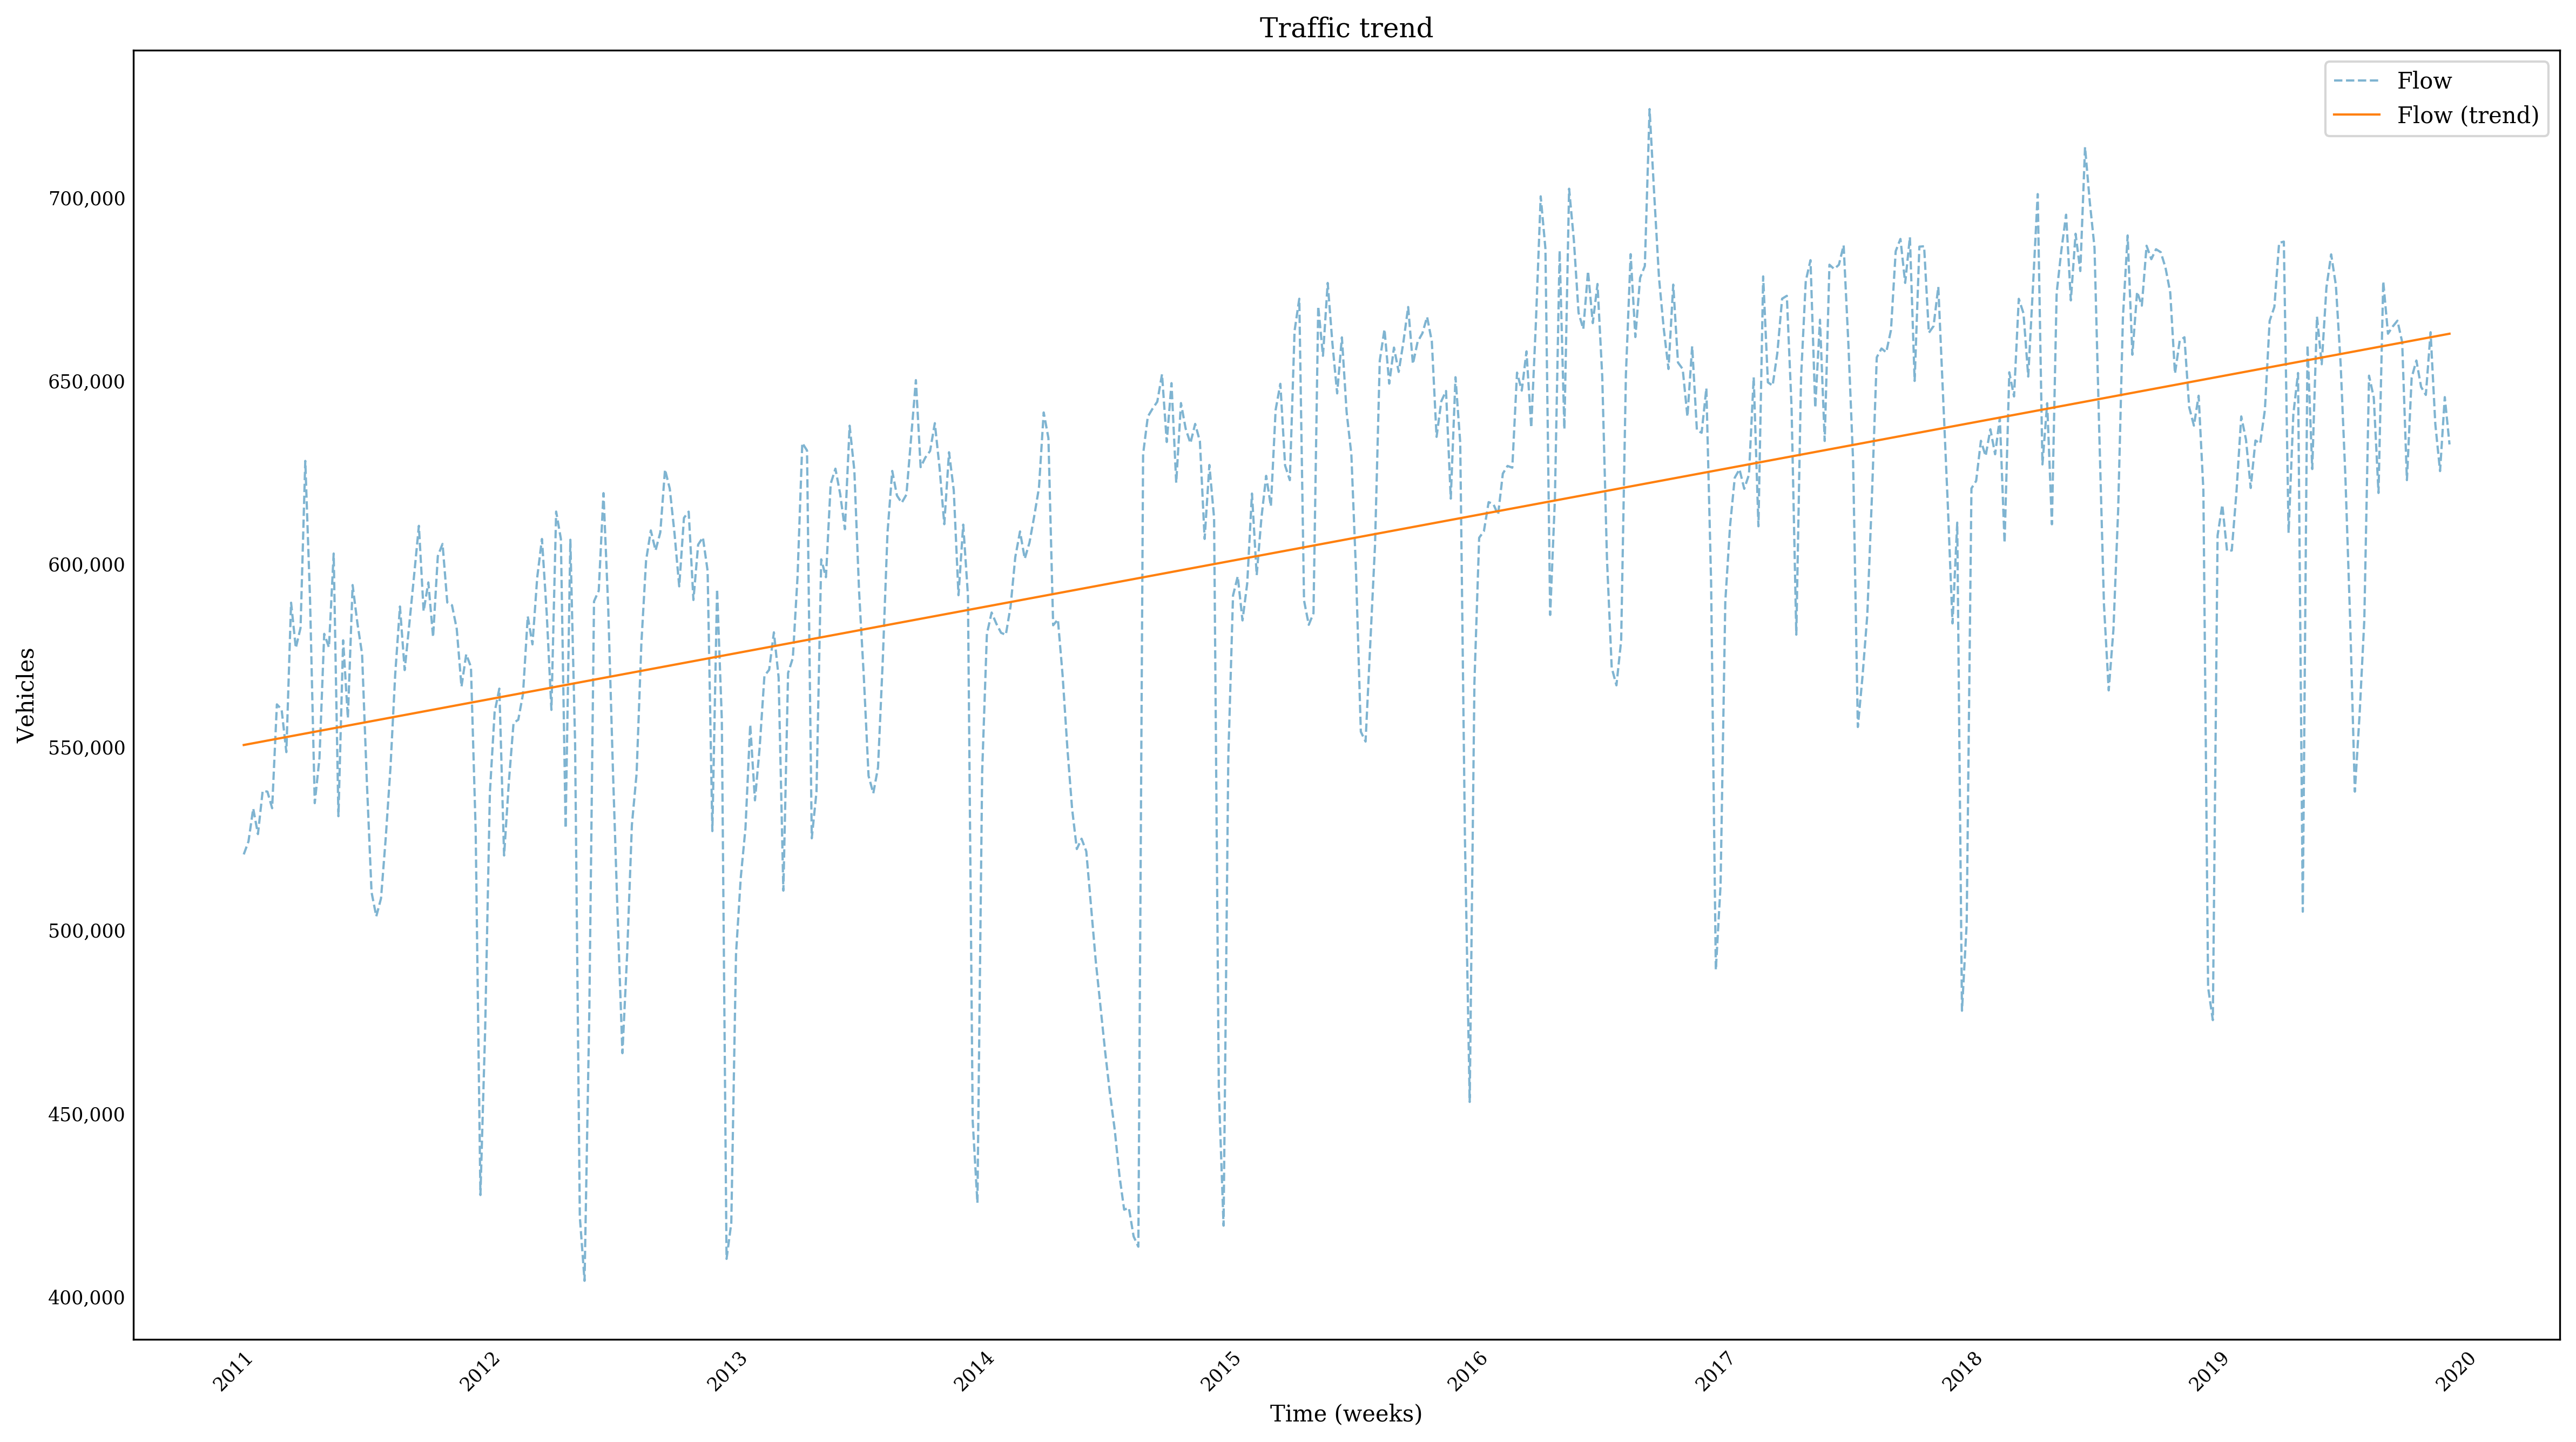

In [7]:
y = temp.values
x = temp.index
xx = pd.to_timedelta(x).total_seconds()
z = np.polyfit(xx, y, 1)
p = np.poly1d(z)

fig, ax = plt.subplots()
ax.plot(x, y, color = colors[0], linestyle = "--", lw = 1, label = "Flow", alpha = 0.5)
ax.plot(x, p(xx), color = colors[1], linestyle = "-", lw = 1, label = "Flow (trend)")
ax.tick_params(axis = 'both', which = 'both',length = 0)
plt.xticks(rotation=45)
ax.set_ylabel("Vehicles")
ax.set_xlabel("Time (weeks)")
ax.set_title("Traffic trend")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend()

# fig.savefig(plotdir + "flow_trend")

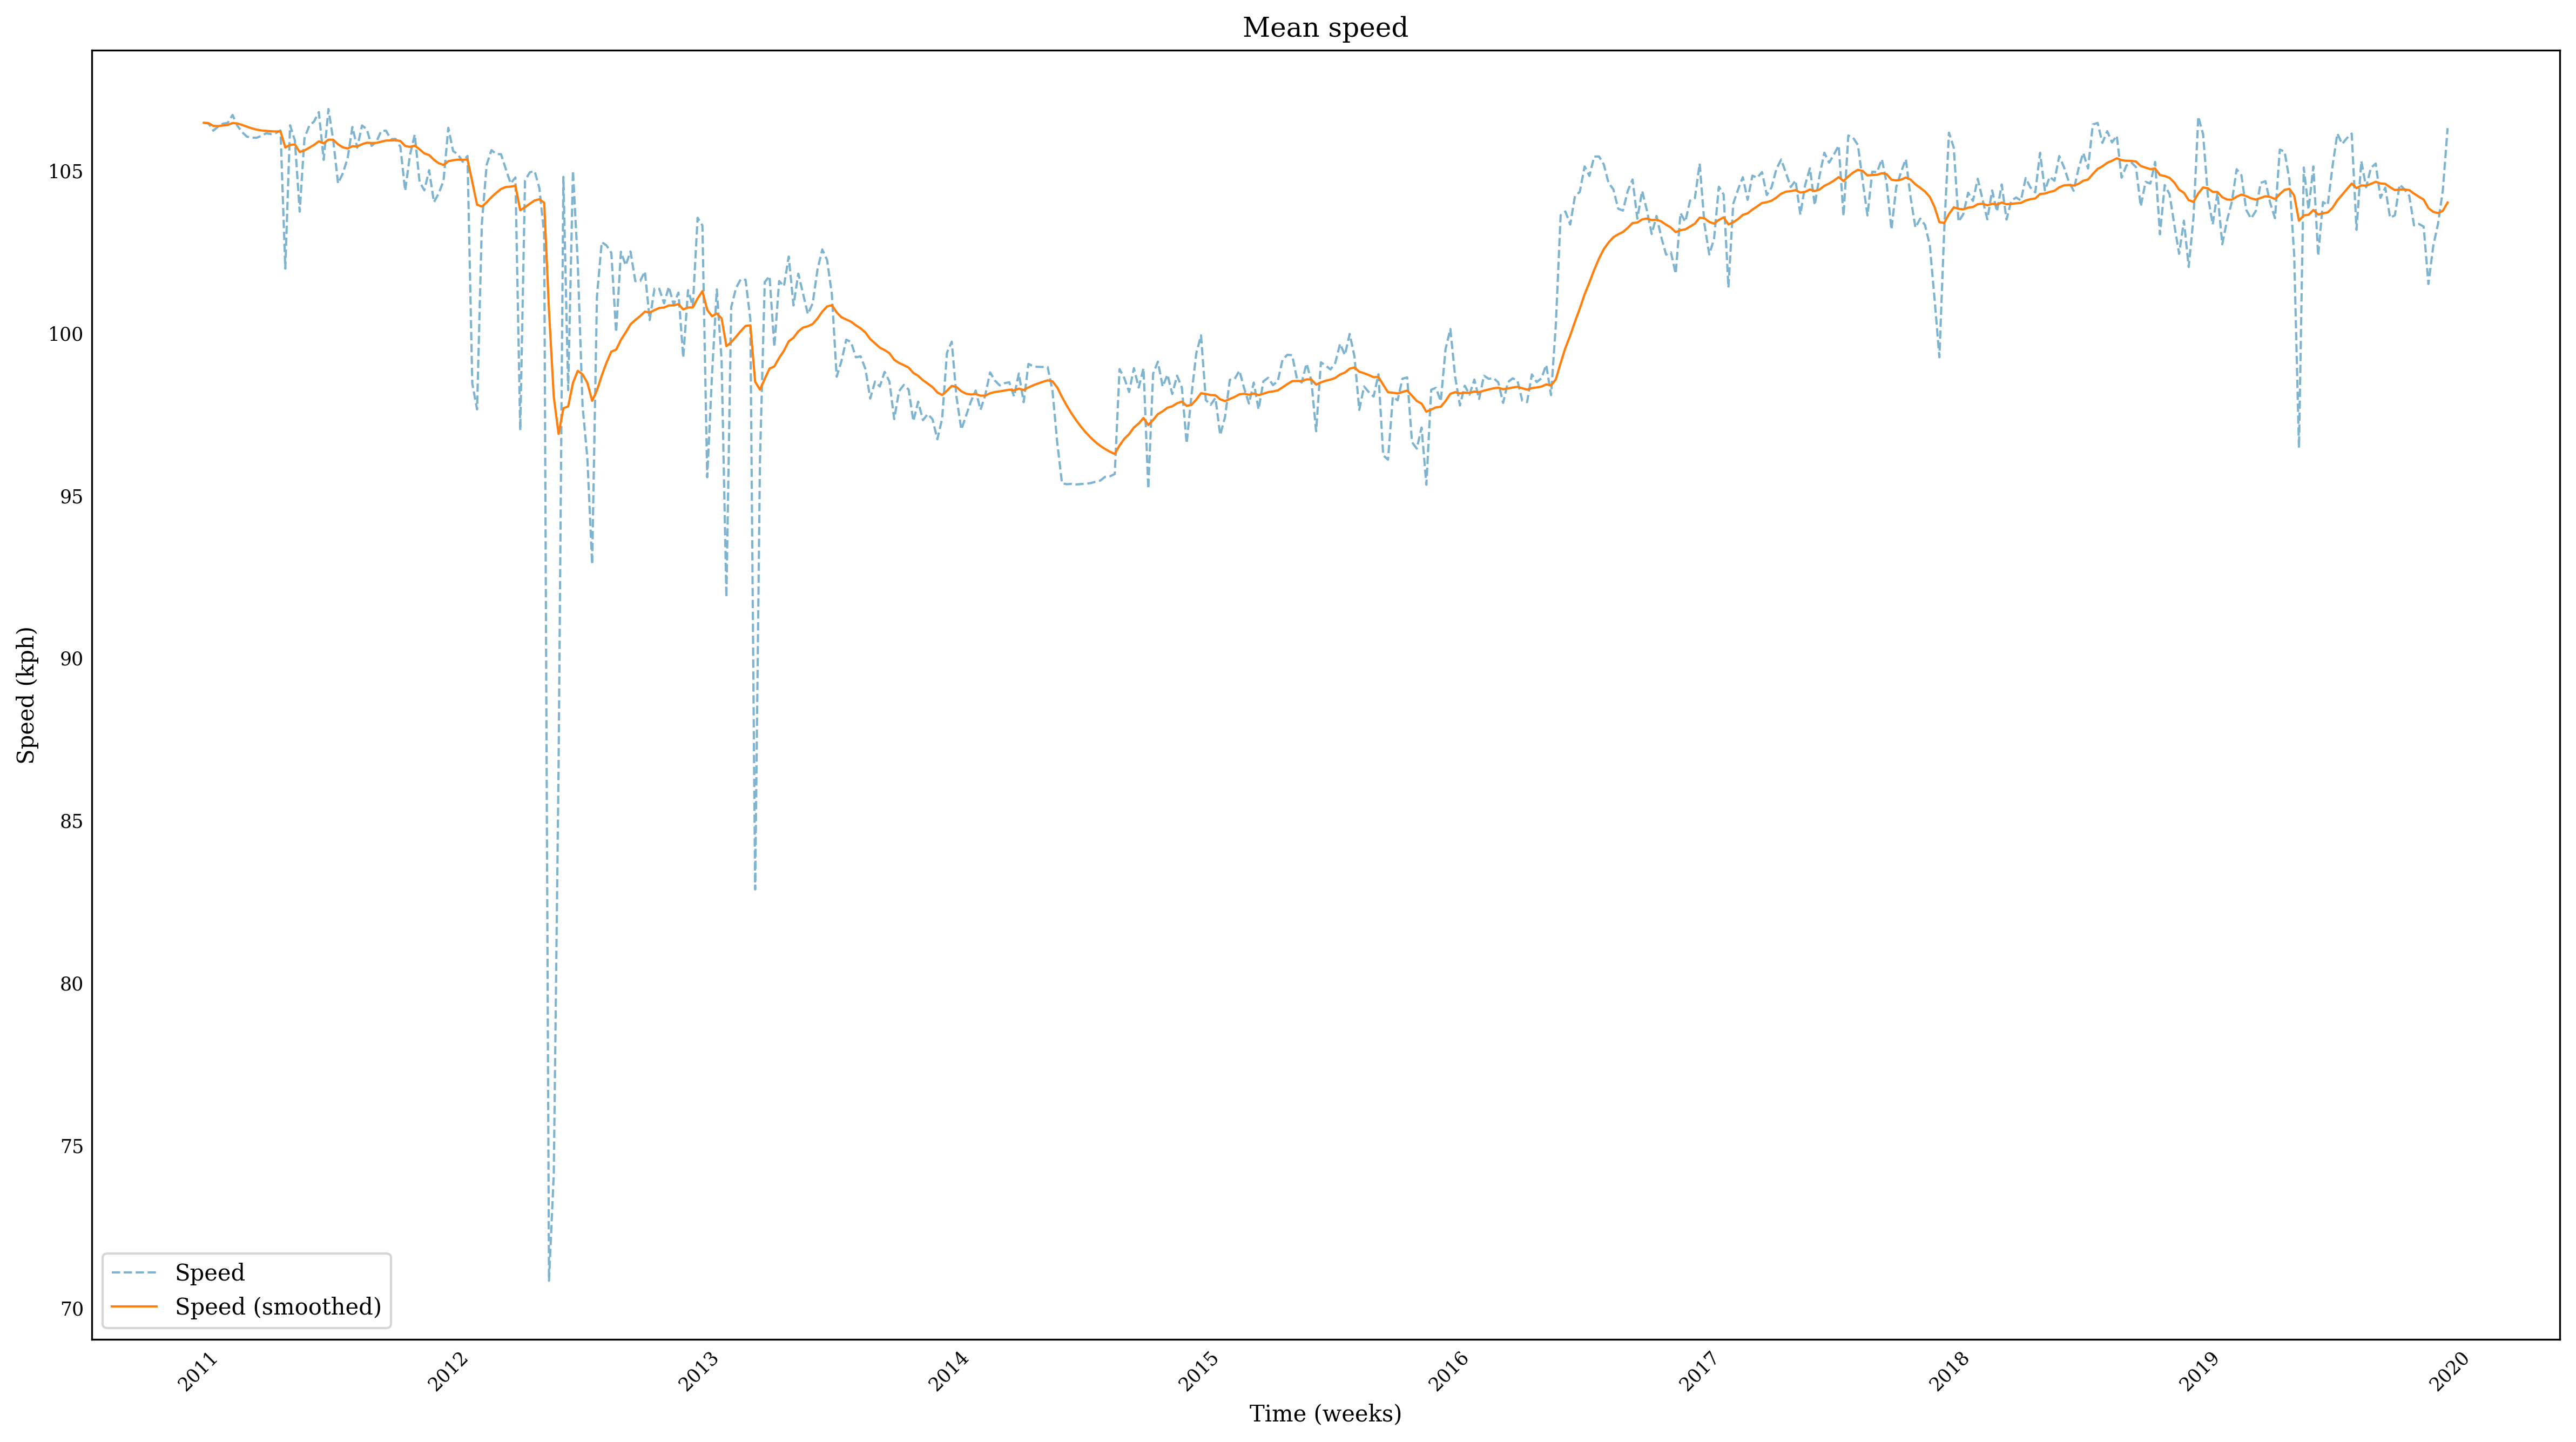

In [36]:
temp = df.resample('W').mean()['speed']
y = temp.values
y1 = temp.ewm(9).mean()
x = temp.index
fig, ax = plt.subplots()
ax.set_title("Mean speed")
ax.set_ylabel("Speed (kph)")
ax.set_xlabel("Time (weeks)")
ax.plot(x, y, linestyle = '--', lw = 1, label = 'Speed', alpha = 0.5)
ax.plot(x, y1, lw = 1, label = 'Speed (smoothed)')
# ax.set_ylim(70, 110)
plt.xticks(rotation=45)
ax.legend()
fig.savefig(plotdir + "mean_speed")

In [0]:
y = df[df.index > "2016-06-02"].speed

In [0]:
fig, ax = plt.subplots()
smt.graphics.plot_pacf(y, lags = 30, ax = ax)
ax.set_title ("Partial Autocorrelation of Speed")
ax.set_ylabel("Partial Autocorrelation")
ax.set_xlabel("Lag (minutes)")
plt.show()
# fig.savefig(plotdir + "pacf_1min_speed")

In [0]:
y_ = y[:60*24*7]
y_15 = y_.resample("15T").mean()
fig, ax = plt.subplots()
ax.plot(y_.index, y_, lw = 0.5, alpha = 0.5)
ax.plot(y_15, lw = 1)
plt.xticks(rotation=45)
fig.savefig(plotdir + "speed_aggregation")

In [0]:
years = [year for year in df.index.year.unique()]

In [0]:
df_D = df['flow'].resample('D').sum()

In [17]:
# years_df = pd.DataFrame()
# for year in years:
#     years_df[str(year)] = pd.concat([years_df, pd.Series(df_D[df_D.index.year == year].values, name = str(year))], axis = 1, ignore_index = True)

ValueError: ignored

In [22]:
for year in years
    plt.barplot)

,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"[65306.933333333334, 72547.0, 74501.0, 78281.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"[45126.933333333334, 62868.0, 69464.9333333333...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"[43445.933333333334, 67435.86666666667, 73120....",NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,"[45034.95, 68352.70833333334, 72074.95, 57575....",NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"[43114.73333333334, 63992.9, 57074.73333333334...",NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,"[45652.76666666667, 57939.66666666667, 53461.9...",NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,"[47685.0, 71724.0, 81049.0, 81671.0, 87884.0, ...",NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[48784.0, 75970.0, 76892.0, 88332.0, 86612.0, ...",NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[47435.0, 74483.0, 81679.0, 83920.0, 66264.0, ..."
